# IEOR 4703 -- Monte Carlo Simulation for FE

## American option pricing via simulation given the exercise boundary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from BMS import BMS_price
import time

from IPython.display import clear_output

### Set parameters

In [ ]:
r = 0.10
q = 0.01
s0 = 100
K = 100
sig = 0.40
tau = 1

### European option price

In [ ]:
europeanPremium = BMS_price('put', s0, K, r, q, sig, tau)

### Load exercise boundary

In [ ]:
exerciseBoundary = np.loadtxt('exerciseBoundaryPut.dat')
print(exerciseBoundary)

[ 66.6  66.6  66.6  66.6  66.6  66.7  66.7  66.7  66.7  66.7  66.8  66.8
  66.8  66.8  66.8  66.9  66.9  66.9  66.9  66.9  67.   67.   67.   67.
  67.   67.1  67.1  67.1  67.1  67.1  67.2  67.2  67.2  67.2  67.2  67.3
  67.3  67.3  67.3  67.3  67.4  67.4  67.4  67.4  67.4  67.5  67.5  67.5
  67.5  67.6  67.6  67.6  67.6  67.6  67.7  67.7  67.7  67.7  67.8  67.8
  67.8  67.8  67.8  67.9  67.9  67.9  67.9  68.   68.   68.   68.   68.1
  68.1  68.1  68.1  68.1  68.2  68.2  68.2  68.2  68.3  68.3  68.3  68.3
  68.4  68.4  68.4  68.4  68.5  68.5  68.5  68.5  68.6  68.6  68.6  68.6
  68.7  68.7  68.7  68.8  68.8  68.8  68.8  68.9  68.9  68.9  68.9  69.
  69.   69.   69.   69.1  69.1  69.1  69.2  69.2  69.2  69.2  69.3  69.3
  69.3  69.4  69.4  69.4  69.4  69.5  69.5  69.5  69.6  69.6  69.6  69.7
  69.7  69.7  69.7  69.8  69.8  69.8  69.9  69.9  69.9  70.   70.   70.
  70.1  70.1  70.1  70.2  70.2  70.2  70.3  70.3  70.3  70.4  70.4  70.4
  70.5  70.5  70.5  70.6  70.6  70.6  70.7  70.7  70.7

### Pricing via Simulation given the exercise boundary

In [ ]:
m = 365
numPaths = 20000
dt = tau/m
s = np.zeros((m+1, numPaths))
t = np.linspace(0, 1, m+1) * tau

threshold = 5

payoffs        = np.zeros(numPaths)
payoffs_early  = np.zeros(numPaths)
payoffs_early2 = np.zeros(numPaths)
indicators     = np.zeros(numPaths, dtype=int)

In [ ]:
np.random.seed(456718)

st = time.time()
for j in range(numPaths):

    s[0,j]  = s0
    T = tau

    # reset the flag
    flag = 0
    flag2 = 0

    for i in range(1, m+1):

        z = np.random.randn()
        s[i,j] = s[i-1,j] * np.exp( (r-q-sig*sig/2)*dt + sig*np.sqrt(dt)*z )

        #print(i,exerciseBoundary[i])

        if flag == 0 and s[i,j] < exerciseBoundary[i]:

            # exercise & discount according to the time of exercise
            # payoffs_early[j] = np.exp(-r*tau)*(K - s[i,j])
            payoffs_early[j] = np.exp(-r*i*dt)*(K - s[i,j])

            # turn the flag on
            flag = 1

        if i == m:
            payoffs[j] = np.exp(-r*tau) * np.maximum(K - s[i,j], 0)

        if flag2 == 0 and s[i,j] < exerciseBoundary[i] + threshold:

            # exercise & discount according to the time of exercise
            # payoffs_early[j] = np.exp(-r*tau)*(K - s[i,j])
            payoffs_early2[j] = np.exp(-r*i*dt)*(K - s[i,j])

            # turn the flag on
            flag2 = 1

    if flag == 0:
        payoffs_early[j] = payoffs[j]
        indicators[j] = 1

    if flag2 == 0:
        payoffs_early2[j] = payoffs[j]

et = time.time()
print('Number of simulations: %i' % numPaths)
print('Elapsed time was %f seconds.' % (et-st))

# simulation output
european  = np.mean(payoffs)
american  = np.mean(payoffs_early)
american2 = np.mean(payoffs_early2)

print('European price(B-M-S): %f' % europeanPremium)
print('European price   (MC): %f' % european)
print('American price   (MC): %f' % american)
print('American tweaked (MC): %f' % american2)

Number of simulations: 20000
Elapsed time was 44.798694 seconds.
European price(B-M-S): 11.131433
European price   (MC): 11.224382
American price   (MC): 12.212236
American tweaked (MC): 11.977508


### Plot a few paths against the exercise boundary (visualization purposes)

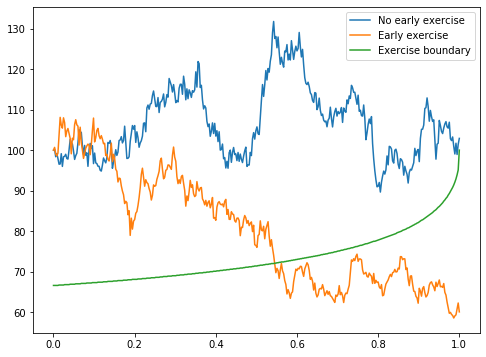

In [ ]:
tmp1 = np.where(indicators == 1)
tmp2 = np.where(indicators == 0)

for i in range(30):
    clear_output(wait=True)
    plt.figure(figsize=(8, 6))
    plt.plot(t, s[:, tmp1[0][i]])
    plt.plot(t, s[:, tmp2[0][i]])
    plt.plot(t, exerciseBoundary)
    plt.legend(['No early exercise', 'Early exercise', 'Exercise boundary'])
    plt.show()
    time.sleep(2)
